<a href="https://colab.research.google.com/github/srijita1406/Data-Analytics/blob/main/Netflix_Shows_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sreejitamukherjee","key":"09f555cd0cf34b46dd68485986e1d0cf"}'}

In [14]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
!kaggle datasets download -d shivamb/netflix-shows

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 148MB/s]


In [18]:
from zipfile import ZipFile
file_name = 'netflix-shows.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [19]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings

In [21]:
import pandas as pd
netflix = pd.read_csv('netflix_titles.csv')


#**Exploratory Data Analysis**



In [8]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [9]:
netflix.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [10]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [36]:
netflix.duplicated().sum()

0

In [38]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
netflix.dtypes.value_counts()

object    11
int64      1
dtype: int64

In [14]:
netflix.shape

(8807, 12)

In [15]:
netflix.describe(include=[object]).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [16]:
netflix.describe(include=[pd.Categorical]).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [17]:
netflix.dropna(how='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [18]:
netflix.groupby(by=['type'],dropna=False).size()

type
Movie      6131
TV Show    2676
dtype: int64

In [48]:
movies = netflix[netflix.type == "Movie"]
movies.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [51]:
shows = netflix[netflix.type == "TV Show"]
shows.isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

# **EDA Visualisation Non Clean Data**

In [2]:
from collections import Counter
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [3]:
from matplotlib import cm

In [5]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [20]:
import plotly
import plotly.express as px
df = pd.DataFrame(data=netflix, columns=["Movie", "TV Show",'type'])
fig = px.histogram(df, x="type", category_orders=dict(type=["Movie", "TV Show"]))
fig.show(renderer="colab")

In [27]:
df_movies = netflix.loc[df['type'] == 'Movie']
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



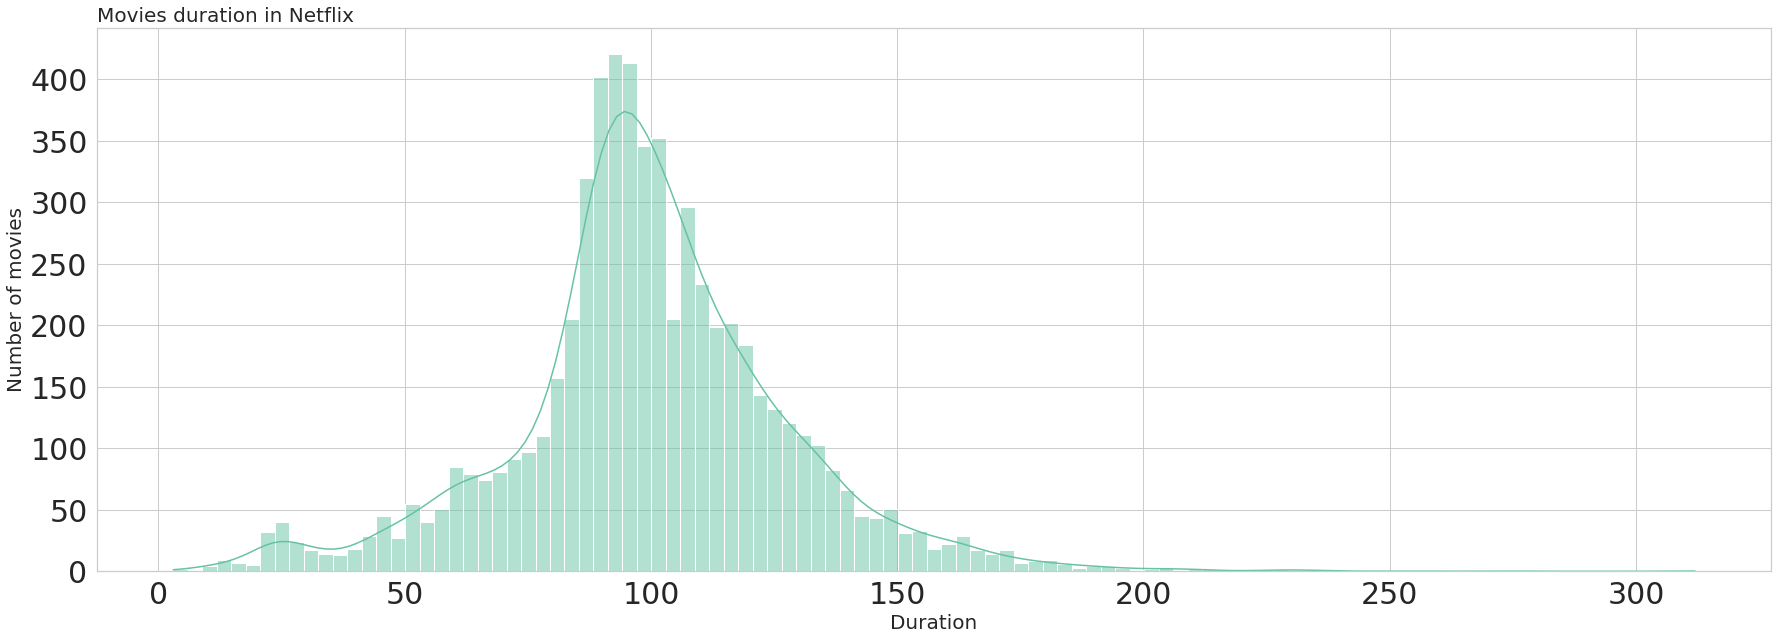

In [23]:
df_movies = netflix.loc[df['type'] == 'Movie']
df_movies['duration'] = df_movies['duration'].str.replace(' min', '')
df_movies['duration'] = df_movies['duration'].apply(lambda x: float(x))
plt.figure(figsize=(30, 10))
sns.set(style="whitegrid",palette=sns.color_palette("Set2"))
sns.histplot(data=df_movies['duration'], kde=True)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Movies duration in Netflix', fontsize=20, loc='left')
plt.xlabel('Duration', fontsize=20)
plt.ylabel('Number of movies', fontsize=20)
plt.show()

In [24]:
df_tv_show = netflix.loc[df['type'] == 'TV Show']

df_group = pd.DataFrame(data=df_tv_show.groupby('duration').size().reset_index())
df_group.rename(columns={0: 'Number of TV Show'}, inplace=True)

fig = px.pie(df_group, values='Number of TV Show', names='duration',
             color_discrete_sequence=px.colors.sequential.thermal, title='TV shows duration in Netflix')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_traces(textposition='inside', textinfo='percent',textfont_size=14)
fig.show(renderer="colab")

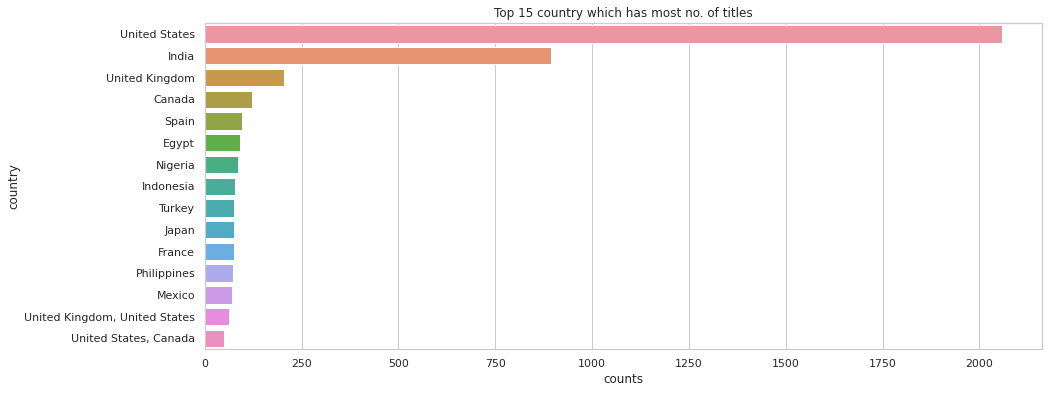

In [25]:
#Top 15 country which has most no. of titles
plt.figure(figsize=(15,6))
top_countries = df_movies['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:15]
sns.barplot(data = top_countries, x= 'counts',y = 'country')
plt.title('Top 15 country which has most no. of titles');



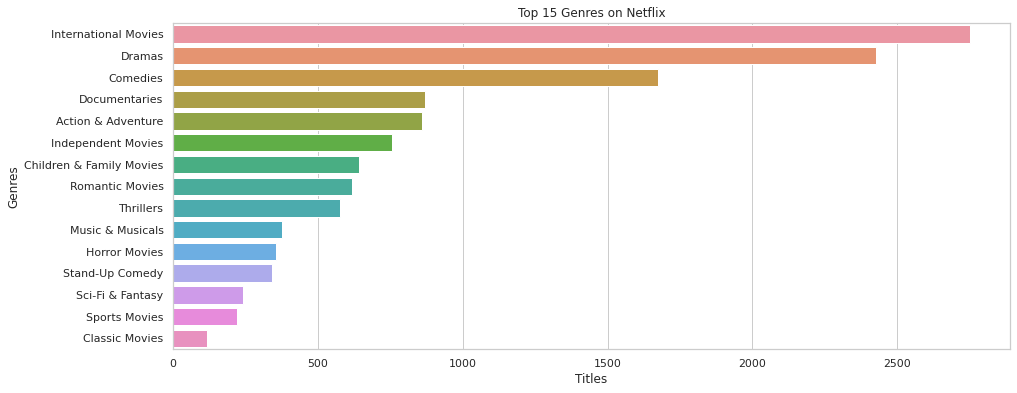

In [18]:
# Top 15 Genres 

filtered_genres = df_movies.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(15,6))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:15])
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



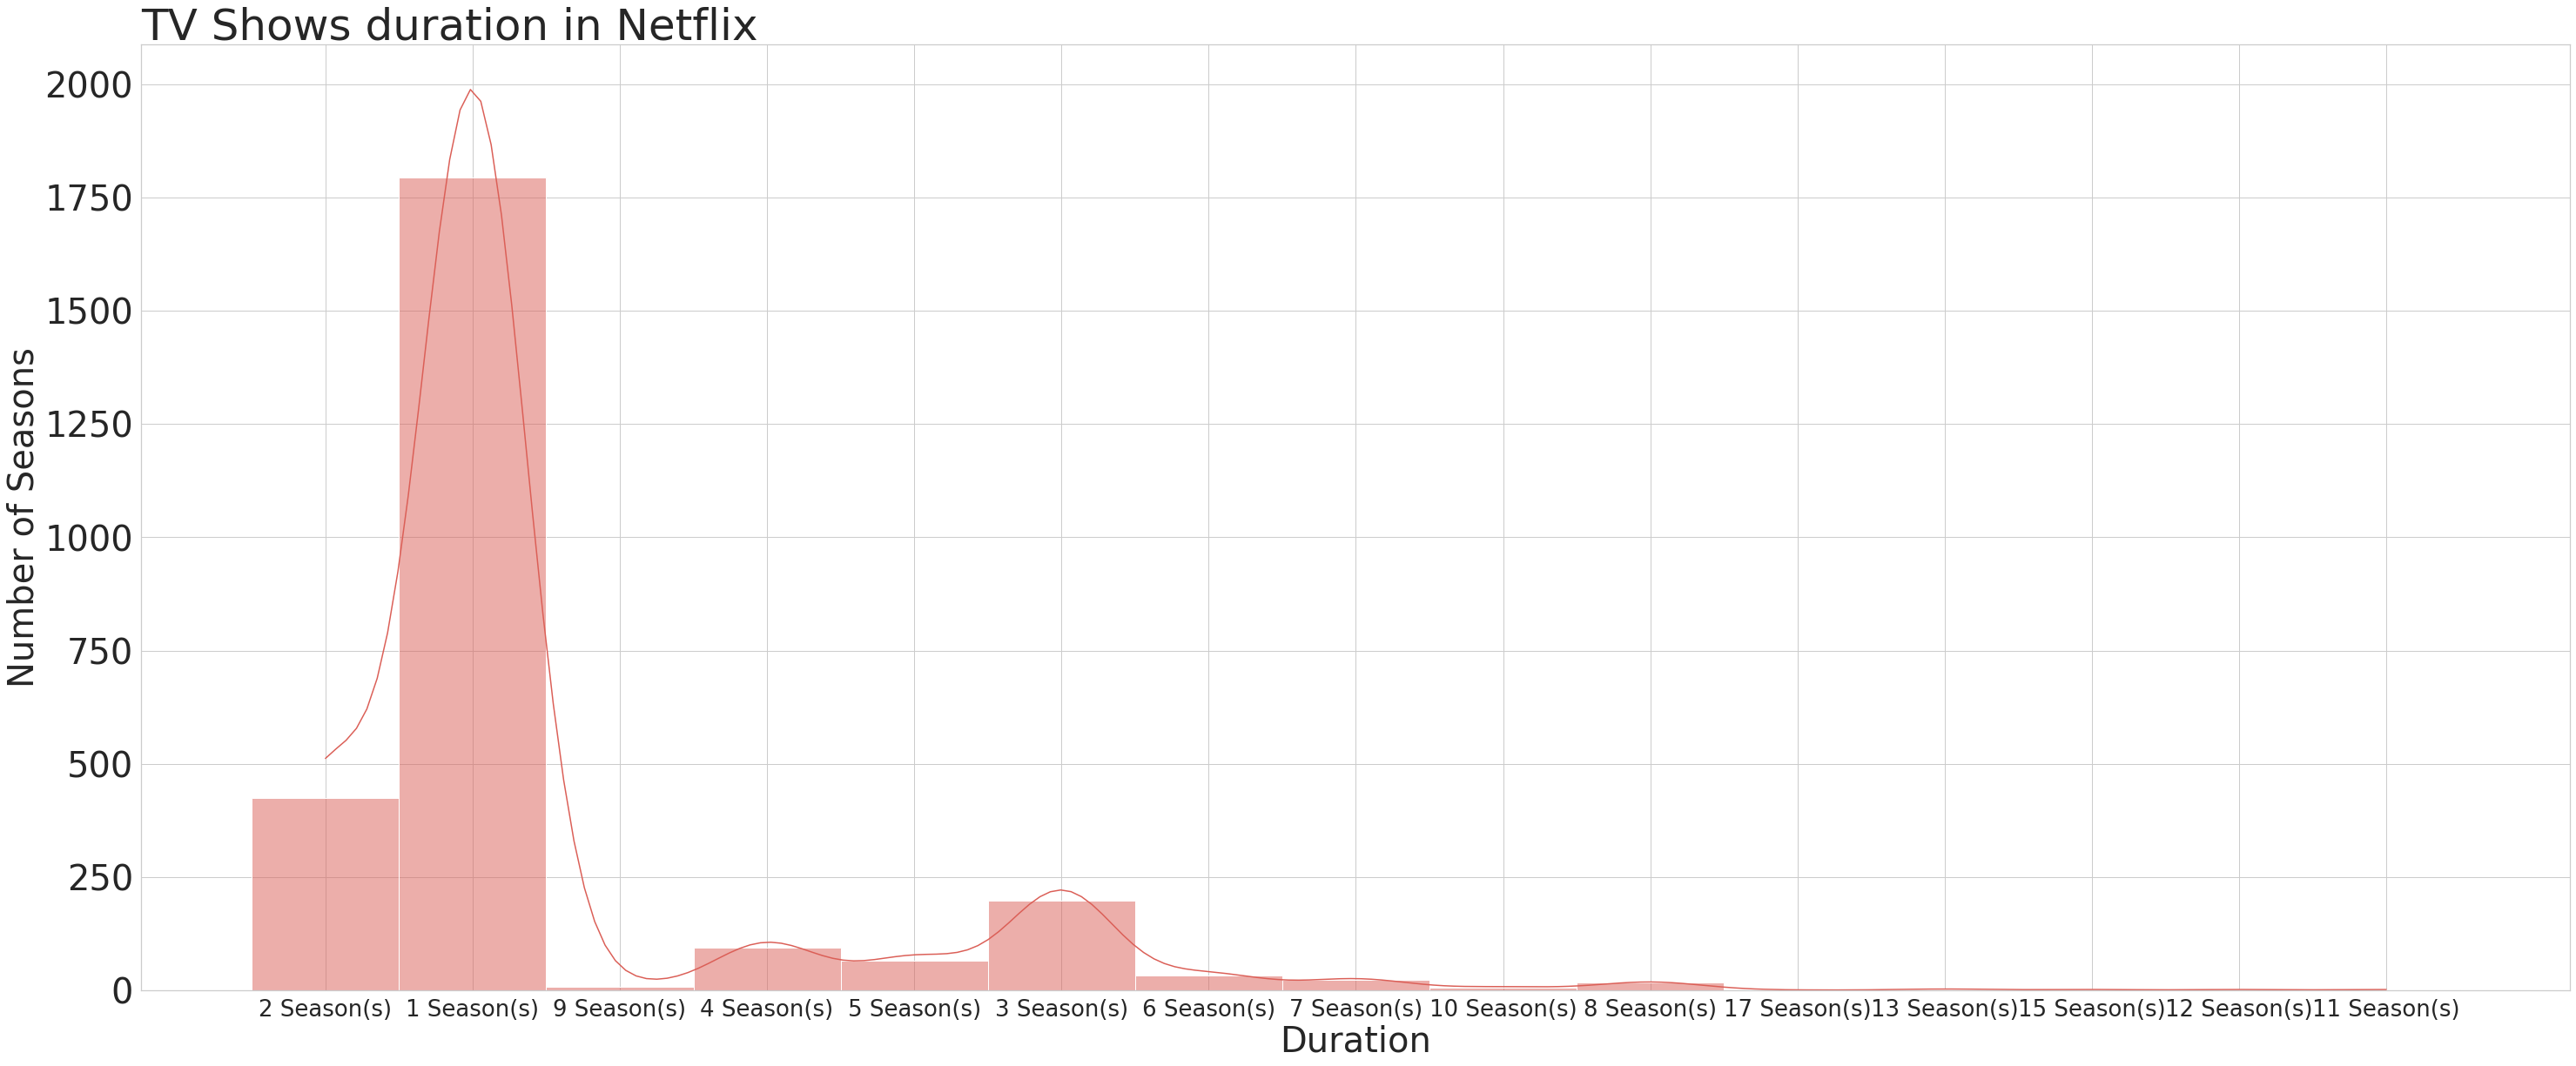

In [19]:
df_tv_show = netflix.loc[df['type'] == 'TV Show']
df_tv_show['duration'] = df_tv_show['duration'].str.replace(' Seasons', ' Season')
df_tv_show['duration'] = df_tv_show['duration'].str.replace(' Season', ' Season(s)')

df_7 = pd.DataFrame(data=df_tv_show.groupby('duration').size().reset_index())
df_7.rename(columns={0: 'Number of TV Show'}, inplace=True)

plt.figure(figsize=(50,20))
sns.set(style="whitegrid",palette=sns.color_palette("hls", 8))
sns.histplot(data=df_tv_show, x='duration',kde=True)
plt.xticks(fontsize=26)
plt.yticks(fontsize=40)
plt.title('TV Shows duration in Netflix', fontsize=50, loc='left')
plt.xlabel('Duration', fontsize=40)
plt.ylabel('Number of Seasons', fontsize=40)
plt.show()

# **Heat Map**

# **STATISTICAL ANALYSIS**

In [59]:
import sys
!{sys.executable} -m pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 21.9 MB 492 kB/s
     |████████████████████████████████| 102 kB 13.6 MB/s 
     |████████████████████████████████| 690 kB 55.8 MB/s 
     |████████████████████████████████| 4.7 MB 58.0 MB/s 
     |████████████████████████████████| 62 kB 63 kB/s 
     |████████████████████████████████| 812 kB 66.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=3f6e59af847c27961671ef032016c010e06215577781d58e3fb7f3dcd17948f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-ei231moe/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=e06c4babeddea4e2f4fcb575a6a1d232c6ac92a78c90324ad2a2c176c76393fe
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash

# **Visualisation Of entire data using Pandas Profiling**

In [1]:
import numpy as np
import pandas as pd


In [2]:

import pandas_profiling 
from pandas_profiling import ProfileReport

In [3]:
netflix = pd.read_csv('netflix_titles.csv')


In [4]:
ProfileReport(netflix)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
from google.colab import output
output.enable_custom_widget_manager()

In [8]:
from google.colab import output
output.disable_custom_widget_manager()

In [9]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 8.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


# **Creating a contingency table to find relation between variables**

In [28]:
contingency = pd.crosstab(netflix['type'],netflix['rating'],
                         
                               margins = False)
print(contingency)

rating   66 min  74 min  84 min   G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  \
type                                                                           
Movie         1       1       1  41      3  75  287    490  797   1427   126   
TV Show       0       0       0   0      0   5    0      0    2    733    94   

rating   TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR  
type                                              
Movie     2062    540   131    139         5   3  
TV Show   1145    323   176    195         1   0  


In [40]:
df1 = netflix[['type', 'rating']]
print(df1.head(1500))

         type rating
0       Movie  PG-13
1     TV Show  TV-MA
2     TV Show  TV-MA
3     TV Show  TV-MA
4     TV Show  TV-MA
...       ...    ...
1495    Movie  TV-MA
1496    Movie   TV-G
1497    Movie  TV-14
1498    Movie  TV-14
1499    Movie  PG-13

[1500 rows x 2 columns]


In [53]:
df2=df1.loc[df1['type'] =='Movie']
df3=pd.DataFrame(data=df2.groupby(by=["rating"]).size())
print(df3.head(3000))

             0
rating        
66 min       1
74 min       1
84 min       1
G           41
NC-17        3
NR          75
PG         287
PG-13      490
R          797
TV-14     1427
TV-G       126
TV-MA     2062
TV-PG      540
TV-Y       131
TV-Y7      139
TV-Y7-FV     5
UR           3
